### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
df = pd.read_csv(r'C:\Users\ortiz\OneDrive\Documents\GitHub\DS_PT_09_2023\Machine_Learning\3-No_Supervisado\3-Clustering\Practica\data\drugLibTrain_raw.tsv', sep= '\t', index_col='Unnamed: 0')

In [77]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [78]:
def cardinalidad(data):
    '''Funcion para saber la cardinalidad de las varibales que tenemos en el data frame'''
    df_cardin = pd.DataFrame([{
                'variable' : i,
                'tipo_dato' : data[i].dtypes,
                'cantidad_de_nulos' : data[i].isna().sum(),
                'valores_unicos' : data[i].unique(),
                'cardinalidad' : data[i].nunique(),
                'porcentaje_cardinalidad' : (data[i].nunique()/data.shape[0])*100
            } for i in data])
    
    return df_cardin

In [79]:
cardinalidad(df)

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad
0,urlDrugName,object,0,"[enalapril, ortho-tri-cyclen, ponstel, prilose...",502,16.157065
1,rating,int64,0,"[4, 1, 10, 3, 2, 9, 7, 8, 6, 5]",10,0.321854
2,effectiveness,object,0,"[Highly Effective, Marginally Effective, Ineff...",5,0.160927
3,sideEffects,object,0,"[Mild Side Effects, Severe Side Effects, No Si...",5,0.160927
4,condition,object,1,"[management of congestive heart failure, birth...",1426,45.896363
5,benefitsReview,object,18,[slowed the progression of left ventricular dy...,3031,97.553911
6,sideEffectsReview,object,75,"[cough, hypotension , proteinuria, impotence ,...",2813,90.537496
7,commentsReview,object,12,"[monitor blood pressure , weight and asses for...",3046,98.036691


In [80]:
df_1 = df[['rating', 'effectiveness', 'sideEffects']]

In [81]:
df_1

,rating,effectiveness,sideEffects
2202,4,Highly Effective,Mild Side Effects
3117,1,Highly Effective,Severe Side Effects
1146,10,Highly Effective,No Side Effects
3947,3,Marginally Effective,Mild Side Effects
1951,2,Marginally Effective,Severe Side Effects
...,...,...,...
1039,10,Highly Effective,Mild Side Effects
3281,1,Ineffective,Extremely Severe Side Effects
1664,2,Marginally Effective,Moderate Side Effects
2621,8,Considerably Effective,Mild Side Effects


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [82]:
df_1

,rating,effectiveness,sideEffects
2202,4,Highly Effective,Mild Side Effects
3117,1,Highly Effective,Severe Side Effects
1146,10,Highly Effective,No Side Effects
3947,3,Marginally Effective,Mild Side Effects
1951,2,Marginally Effective,Severe Side Effects
...,...,...,...
1039,10,Highly Effective,Mild Side Effects
3281,1,Ineffective,Extremely Severe Side Effects
1664,2,Marginally Effective,Moderate Side Effects
2621,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [83]:
my_dict_0 = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [84]:
df_1['effectiveness'] = df_1['effectiveness'].map(my_dict_0)

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19528\1456939612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['effectiveness'] = df_1['effectiveness'].map(my_dict_0)


In [85]:
my_dict_1 = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [86]:
df_1['sideEffects'] = df_1['sideEffects'].map(my_dict_1)

C:\Users\ortiz\AppData\Local\Temp\ipykernel_19528\2781444625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['sideEffects'] = df_1['sideEffects'].map(my_dict_1)


In [87]:
df_1

,rating,effectiveness,sideEffects
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3
...,...,...,...
1039,10,4,1
3281,1,0,4
1664,2,1,2
2621,8,3,1


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [88]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 

Mayor silhouette scores con K=2

In [89]:
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_1)
    predd = km.predict(df_1)
    print(f'K = {i}')
    print(silhouette_score(df_1, km.labels_))
    print(km.inertia_)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K = 2
0.6190969508782411
11137.736723639344
K = 3
0.4541665291694327
7254.022835331667
K = 4
0.416701237123931
5690.593041671108
K = 5


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4152173517501398
4799.917418448657
K = 6
0.40776675491666886
4234.6669755629555
K = 7


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4044764199227224
3783.4071304392523
K = 8
0.3887036746255966
3345.210728306221
K = 9


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4139468434587661
2981.3527909129807
K = 10


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.40740876245511143
2745.4130964698334
K = 11
0.4310097927318671
2603.126355649418
K = 12


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.41912862408038365
2414.8593025405185
K = 13
0.45984445240995503
2288.182515913504
K = 14


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4448386290466004
2137.50694404698
K = 15
0.4811118973055916
1987.1375814445864
K = 16


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4695772796209039
1898.8198318273608
K = 17
0.46198189887903474
1904.7463184767548
K = 18


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.484789428962796
1747.3184792761601
K = 19
0.4984087298544331
1674.7864525317084


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [90]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_1)
                for k in range(2, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [91]:
inertias

[11137.736723639344,
 7254.022835331667,
 5690.593041671109,
 4799.917418448657,
 4234.6669755629555,
 3783.4071304392514,
 3345.2107283062205,
 2981.3527909129807,
 2745.4130964698334,
 2603.126355649418,
 2414.8593025405185,
 2288.1825159135033,
 2137.50694404698,
 1987.1375814445864,
 1898.8198318273605,
 1904.746318476755,
 1747.31847927616,
 1674.786452531708]

In [92]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
df_kmeans

,inertia,inertia_1,diff%
0,11137.736724,NaN,NaN
1,7254.022835,11137.736724,0.651301
2,5690.593042,7254.022835,0.784474
3,4799.917418,5690.593042,0.843483
4,4234.666976,4799.917418,0.882237
5,3783.407130,4234.666976,0.893437
6,3345.210728,3783.407130,0.884179
7,2981.352791,3345.210728,0.891230
8,2745.413096,2981.352791,0.920862
9,2603.126356,2745.413096,0.948173


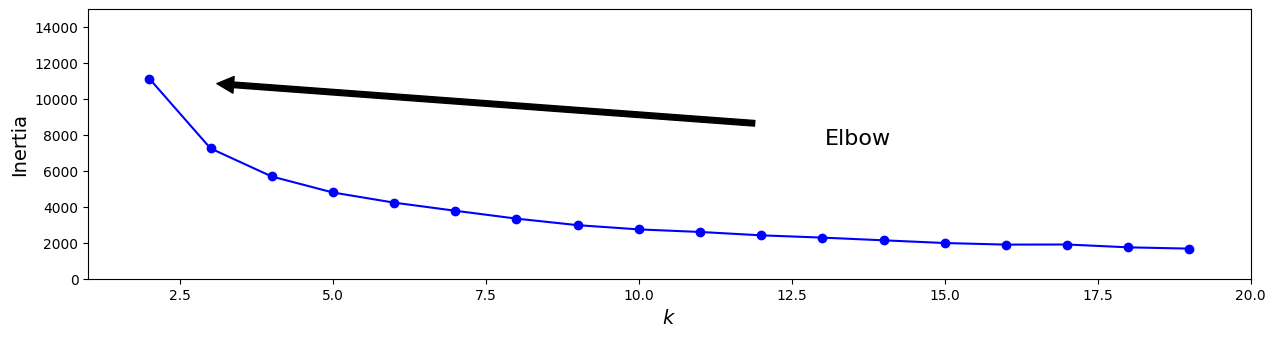

In [100]:
plt.figure(figsize=(15, 3.5))
plt.plot(range(2, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[0]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 20, 0, 15000])
plt.show()

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [101]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(df_1)
predd = km.predict(df_1)
print(f'K = 2')
print(silhouette_score(df_1, km.labels_))
print(km.inertia_)

K = 2
0.6190969508782411
11137.736723639344


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [102]:
df_c = pd.DataFrame(predd, columns=['Cluster'])

In [106]:
df_c.shape

(3107, 1)

<Axes: ylabel='count'>

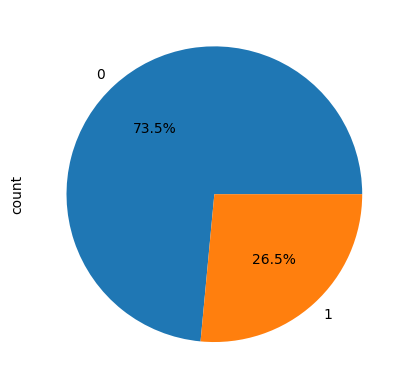

In [104]:
df_c['Cluster'].value_counts().plot.pie(autopct="%.1f%%")